# Exploratory Data Analysis of a Hospital Network's Encounter-Level Dataset


Exploring the Synthea Healthcare encounter-level dataset. Performing descriptive and inferential statistics to understad the data, make findings, test some hypothesis and draw meaningful conclusions to help optimise capacity planning, care pathways, and readmission reduction using historical encounter-level data.

In [144]:
# importing all necessary packages
import warnings
warnings.filterwarnings("ignore") #disabling warnings in the notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.0 Exploring the Encounter-Level Dataset
### 1.1 Importing and Preparing the Data

In [145]:
#importing the dataset
encounter_lvl_df = pd.read_csv("./data/synthea_healthcare_data.csv")
encounter_lvl_df.head()

,ID,PATIENT,START,STOP,MONTH,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019-02-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019-03-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN
2,0bee1ce6-3e2c-5506-f71c-a7ba8f64a3d3,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-05-26 05:07:38,2019-05-26 05:22:38,2019-05-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,1292.75,0.268309,410620009,Well child visit (procedure),NaN
3,6e93bcf9-45a4-8528-0120-1c1eaa930faf,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-07-28 05:07:38,2019-07-28 05:22:38,2019-07-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,1323.87,0.440794,410620009,Well child visit (procedure),NaN
4,8b6787c3-4316-a0cb-899d-4746525c319f,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-10-27 05:07:38,2019-10-27 05:22:38,2019-10-01,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,831.76,0.689938,410620009,Well child visit (procedure),NaN


In [146]:
encounter_lvl_df.shape #showing the size of the dataset

(61459, 15)

In [147]:
encounter_lvl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 61459 non-null  object 
 1   PATIENT            61459 non-null  object 
 2   START              61459 non-null  object 
 3   STOP               61459 non-null  object 
 4   MONTH              61459 non-null  object 
 5   ENCOUNTERCLASS     61459 non-null  object 
 6   PROVIDER           61459 non-null  object 
 7   REASONCODE         15957 non-null  float64
 8   REASONDESCRIPTION  15957 non-null  object 
 9   LOS_DAYS           61459 non-null  float64
 10  TOTAL_COST         61459 non-null  float64
 11  AGE_AT_START       61459 non-null  float64
 12  PRIMARY_DIAG_CODE  61459 non-null  int64  
 13  PRIMARY_DIAG_DESC  61459 non-null  object 
 14  CONDITION_COUNT    26904 non-null  float64
dtypes: float64(5), int64(1), object(9)
memory usage: 7.0+ MB


In [148]:
encounter_lvl_df.isna().sum() #show number of null/blank cells

ID                       0
PATIENT                  0
START                    0
STOP                     0
MONTH                    0
ENCOUNTERCLASS           0
PROVIDER                 0
REASONCODE           45502
REASONDESCRIPTION    45502
LOS_DAYS                 0
TOTAL_COST               0
AGE_AT_START             0
PRIMARY_DIAG_CODE        0
PRIMARY_DIAG_DESC        0
CONDITION_COUNT      34555
dtype: int64

`REASONCODE`, `REASONDESCRIPTION`, and `CONDITION_COUNT` contain very large number of blank rows which will be treated.

In [149]:
#Checking the format of the time series attributes (START and STOP)
type(encounter_lvl_df.START.iloc[0]), type(encounter_lvl_df.STOP.iloc[0])

(str, str)

As shown above, the time series attributes `START` and `STOP` as shown above are formated as strings and need to be reformated to date-time.

In [150]:
# Checking the data-type of the `REASONCODE` attribute
encounter_lvl_df.REASONCODE.dtype

dtype('float64')

As shown above, the values of the `REASONCODE` variable are wrongly imported as continous numerical veriables instead of discrete categorical numbers.

From the exploration steps above, the following were observed;
* The dataset contains 61,459 observations and 15 attributes.  
* The `ID` column represent the unique identifier of each patient.  
* The `START` and `STOP` dates show the entry and exit dates of each patient while the `MONTH` is the month of entry.   
* `LOS_DAYS` and `AGE_AT_START` are represented as a continuous variable in years, to accurately represent the months, days, and time difference. This will be retained in its original format for more precise analysis and modeling.

**The Identified Columns' Properties**

| Attribute         | Variable class    | Identified Issues
| ----------------- | ----------------- | -----------------
| ID                | Categorical       | None
| PATIENT           | Categorical       | None
| START             | Numerical         | Needs reformating to date-time
| STOP              | Numerical         | Needs reformating to date-time
| MONTH             | Categorical       | Needs reformating to the month's name
| ENCOUNTERCLASS    | Categorical       | None
| PROVIDER          | Categorical       | None
| REASONCODE        | Categorical       | Contains 45,502 blank cells and wrongly formated as continous numerical variable
| REASONDESCRIPTION | Categorical       | Contains 45,502 blank cells
| LOS_DAYS          | Numerical         | None
| TOTAL_COST        | Numerical         | None
| AGE_AT_START      | Numerical         | None
| PRIMARY_DIAG_CODE | Categorical       | None
| PRIMARY_DIAG_DESC | Categorical       | None
| CONDITION_COUNT   | Numerical         | Contains 34,555 blank cells

### 1.2 Cleaning the Data 
**1. Changing the data type of the `START` and `STOP` attributes from string to date-time**

In [151]:
import datetime as dt

def convert_2_date_time(date_time_str):
    return dt.datetime.strptime(date_time_str, "%Y-%m-%d %H:%M:%S")

In [152]:
encounter_lvl_df.START = encounter_lvl_df.START.apply(convert_2_date_time)
encounter_lvl_df.STOP = encounter_lvl_df.STOP.apply(convert_2_date_time)

encounter_lvl_df.START.iloc[0] #preview the result

Timestamp('2019-02-17 05:07:38')

**2. Changing the `MONTH` attribute to the corresponding month name**

In [153]:
def get_month_name(date_str):
    dateObj = dt.datetime.strptime(date_str, "%Y-%m-%d") #convert the date string to date data type
    return dateObj.strftime("%B") #get the month name

In [154]:
encounter_lvl_df.MONTH = encounter_lvl_df.MONTH.apply(get_month_name)
encounter_lvl_df.head()

,ID,PATIENT,START,STOP,MONTH,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,February,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,March,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN
2,0bee1ce6-3e2c-5506-f71c-a7ba8f64a3d3,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-05-26 05:07:38,2019-05-26 05:22:38,May,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,1292.75,0.268309,410620009,Well child visit (procedure),NaN
3,6e93bcf9-45a4-8528-0120-1c1eaa930faf,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-07-28 05:07:38,2019-07-28 05:22:38,July,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,1323.87,0.440794,410620009,Well child visit (procedure),NaN
4,8b6787c3-4316-a0cb-899d-4746525c319f,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-10-27 05:07:38,2019-10-27 05:22:38,October,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,831.76,0.689938,410620009,Well child visit (procedure),NaN


Inserting an extra column after the `MONTH` column for the ordinal numerical representation of each month to help with time series analysis in chronological order.

In [155]:
encounter_lvl_df.insert(list(encounter_lvl_df.columns).index("MONTH") + 1, "MONTH_ID", encounter_lvl_df.START.dt.month) #encode the month and insert it into the dataframe just after the "MONTH" column
encounter_lvl_df.insert(list(encounter_lvl_df.columns).index("STOP") + 1, "YEAR", encounter_lvl_df.START.dt.year) #extract the year from the START Date and insert it into the dataframe just after the "STOP" date column
encounter_lvl_df.head(2)

,ID,PATIENT,START,STOP,YEAR,MONTH,MONTH_ID,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,February,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,March,3,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,NaN,NaN,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN


**3. Treating the missing values in the `REASONCODE` and `REASONDESCRIPTION` attributes.**  

>* These are categorical attributes with 45,502 blank cells in each column. Removing these huge number of rows from the dataset may cause the data to be skewed and negatively affect the analysis of other important attributes and their relationships. Filling the blank cells with the median value may also skew the data due to the huge number of blanks. 
>* Since these two attributes are categorical attributes, a new category will be created in each to represent the unspecified variables. 
>* Whereever there is an observation with both the `REASONCODE` and `REASONDESCRIPTION` attributes missing. They will be filled with __"0"__ and __"Unspecified"__ respectively. 
>* If there are rows with only one of the two attributes missing, the rows will be dropped from the table.

In [156]:
encounter_lvl_df.loc[(encounter_lvl_df["REASONCODE"].isna() & encounter_lvl_df["REASONDESCRIPTION"].isna()), "REASONCODE"] = 0
encounter_lvl_df.loc[(encounter_lvl_df["REASONCODE"] == 0), "REASONDESCRIPTION"] = "Unspecified"
encounter_lvl_df.head()

,ID,PATIENT,START,STOP,YEAR,MONTH,MONTH_ID,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,February,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.0,Unspecified,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,March,3,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.0,Unspecified,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN
2,0bee1ce6-3e2c-5506-f71c-a7ba8f64a3d3,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-05-26 05:07:38,2019-05-26 05:22:38,2019,May,5,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.0,Unspecified,0.010417,1292.75,0.268309,410620009,Well child visit (procedure),NaN
3,6e93bcf9-45a4-8528-0120-1c1eaa930faf,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-07-28 05:07:38,2019-07-28 05:22:38,2019,July,7,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.0,Unspecified,0.010417,1323.87,0.440794,410620009,Well child visit (procedure),NaN
4,8b6787c3-4316-a0cb-899d-4746525c319f,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-10-27 05:07:38,2019-10-27 05:22:38,2019,October,10,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0.0,Unspecified,0.010417,831.76,0.689938,410620009,Well child visit (procedure),NaN


In [157]:
print(f"Number of filled blanks in 'REASONCODE': {encounter_lvl_df[encounter_lvl_df["REASONCODE"] == 0]["REASONCODE"].count()}")
print(f"Number of filled blanks in 'REASONDESCRIPTION': {encounter_lvl_df[encounter_lvl_df["REASONDESCRIPTION"] == "Unspecified"]["REASONDESCRIPTION"].count()}")

Number of filled blanks in 'REASONCODE': 45502
Number of filled blanks in 'REASONDESCRIPTION': 45502


The total number of blank rows replaced in `REASONCODE`  and `REASONDESCRIPTION` is the same as the initially discorvered count in each column. That means there were no rows where only one of the two columns was blank. Hence, all the blank attributes have been filled with the new default categorical values for representing __unspecified__ attributes.

In [158]:
#Changing the REASONCODE's datatype from float (continous) to int (discrete) because its a categorical variable
encounter_lvl_df.REASONCODE = encounter_lvl_df.REASONCODE.apply(lambda x: int(x))
encounter_lvl_df.head(2)

,ID,PATIENT,START,STOP,YEAR,MONTH,MONTH_ID,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,February,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0,Unspecified,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,March,3,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0,Unspecified,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN


**4. Treating the blank cells in `CONDITION_COUNT` attribute**

In [159]:
#checking the proportion of the missing values to filled values in the column
print(f"Number of blank cells in 'CONDITION_COUNT': {encounter_lvl_df.CONDITION_COUNT.isna().sum()}")
print(f"Scale of missing values in 'CONDITION_COUNT': {round((encounter_lvl_df.CONDITION_COUNT.isna().sum()/len(encounter_lvl_df))*100, 2)}%")

Number of blank cells in 'CONDITION_COUNT': 34555
Scale of missing values in 'CONDITION_COUNT': 56.22%


`CONDITION_COUNT` contains 34,555 blank cells which represent over 56% of the data in the attribute. Droping the missing rows may largely affect analysis of this dataset, hence, these values will be retained as missing and explicitly accounted for in analysis.

To enable analysis involving `CONDITION_COUNT`, an extra attribute called `CONDITION_COUNT_PRESENT` will be created to classify the present state of the condition count ('present' for non-blank, 'missing' for blank cells). This will enable easy filtering when needed.

In [160]:
#creating the extra column called CONDITION_COUNT_VALID for classifying the validity of each condition count cell
encounter_lvl_df["CONDITION_COUNT_PRESENT"] = np.where(encounter_lvl_df.CONDITION_COUNT.isna(), "missing", "present")
encounter_lvl_df.head(2)

,ID,PATIENT,START,STOP,YEAR,MONTH,MONTH_ID,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT,CONDITION_COUNT_PRESENT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,February,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0,Unspecified,0.010417,877.79,0.000000,410620009,Well child visit (procedure),NaN,missing
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,March,3,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0,Unspecified,0.010417,269.68,0.095825,410620009,Well child visit (procedure),NaN,missing


In [161]:
#Keep the blanks in `CONDITION_COUNT` as missing (NA)
encounter_lvl_df["CONDITION_COUNT"] = encounter_lvl_df["CONDITION_COUNT"].astype("Int64")
encounter_lvl_df.head(2)

,ID,PATIENT,START,STOP,YEAR,MONTH,MONTH_ID,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT,CONDITION_COUNT_PRESENT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,February,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0,Unspecified,0.010417,877.79,0.000000,410620009,Well child visit (procedure),<NA>,missing
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,March,3,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0,Unspecified,0.010417,269.68,0.095825,410620009,Well child visit (procedure),<NA>,missing


**5. Checking for duplicates rows and removing them**

In [162]:
print(f"Number of duplicate rows: {encounter_lvl_df.duplicated().sum()}")

Number of duplicate rows: 0


There are no duplicate rows. Therefore, the dataframe has been completely cleaned and prepared for analysis.

**6. Performing quick exploration of the cleaned dataset.**

In [163]:
encounter_lvl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61459 entries, 0 to 61458
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       61459 non-null  object        
 1   PATIENT                  61459 non-null  object        
 2   START                    61459 non-null  datetime64[ns]
 3   STOP                     61459 non-null  datetime64[ns]
 4   YEAR                     61459 non-null  int32         
 5   MONTH                    61459 non-null  object        
 6   MONTH_ID                 61459 non-null  int32         
 7   ENCOUNTERCLASS           61459 non-null  object        
 8   PROVIDER                 61459 non-null  object        
 9   REASONCODE               61459 non-null  int64         
 10  REASONDESCRIPTION        61459 non-null  object        
 11  LOS_DAYS                 61459 non-null  float64       
 12  TOTAL_COST               61459 n

As shown in the meta-data above, the dataset now contains 16 attributes, all attributes are formatted properly to the appropriate data-type, and all blank rows are completely filled except '`CONDITION_COUNT`' because of the scale of the missing values and the statistical significance of not dropping or filling those rows to maintain the veracity and the distribution of the variables in the dataset.

In [164]:
encounter_lvl_df.describe().T

,count,mean,min,25%,50%,75%,max,std
START,61459,2005-03-13 05:03:48.042369792,1912-09-26 02:47:25,1997-07-29 19:18:21.500000,2012-10-29 13:24:37,2017-05-31 01:18:50.500000,2021-11-19 16:50:22,NaN
STOP,61459,2005-03-13 11:43:58.700304256,1912-09-26 03:02:25,1997-07-30 06:37:03.500000,2012-10-29 13:50:03,2017-05-31 01:33:50.500000,2021-11-19 17:05:22,NaN
YEAR,61459.0,2004.709562,1912.0,1997.0,2012.0,2017.0,2021.0,17.669957
MONTH_ID,61459.0,6.359427,1.0,3.0,6.0,9.0,12.0,3.475123
REASONCODE,61459.0,1261982262255.819092,0.0,0.0,0.0,10509002.0,10939881000119104.0,108204083639761.90625
LOS_DAYS,61459.0,0.277901,0.010417,0.010417,0.010417,0.010417,5236.0,29.366192
TOTAL_COST,61459.0,4149.657952,0.0,129.16,786.33,1625.89,873646.19,10919.677889
AGE_AT_START,61459.0,42.991802,0.0,22.940452,42.031485,60.903491,109.94935,24.132002
PRIMARY_DIAG_CODE,61459.0,265270659.968776,1505002.0,162673000.0,185347001.0,390906007.0,702927004.0,157517077.726365
CONDITION_COUNT,26904.0,1.415923,1.0,1.0,1.0,2.0,13.0,0.753878


* The earliest admission start date is "1912-09-26 02:47:25" while the latest is "2021-11-19 16:50:22"
* The earliest admission stop date is "1912-09-26 03:02:25" while the latest is "2021-11-19 17:05:22"
* The highest Length-of-Stay days (LOS) is 5,236 days which is estimately 14 years
* The average length of Stay is 0.277901 (days) which is aproximately 6.67 hours

Viewing the trend of admissions per year

In [165]:
yearly_encounters_num = encounter_lvl_df.YEAR.value_counts().sort_index()
yearly_encounters_num

YEAR
1912       2
1914       2
1917       2
1918       2
1919       2
        ... 
2017    2972
2018    3071
2019    3154
2020    3264
2021    4225
Name: count, Length: 106, dtype: int64

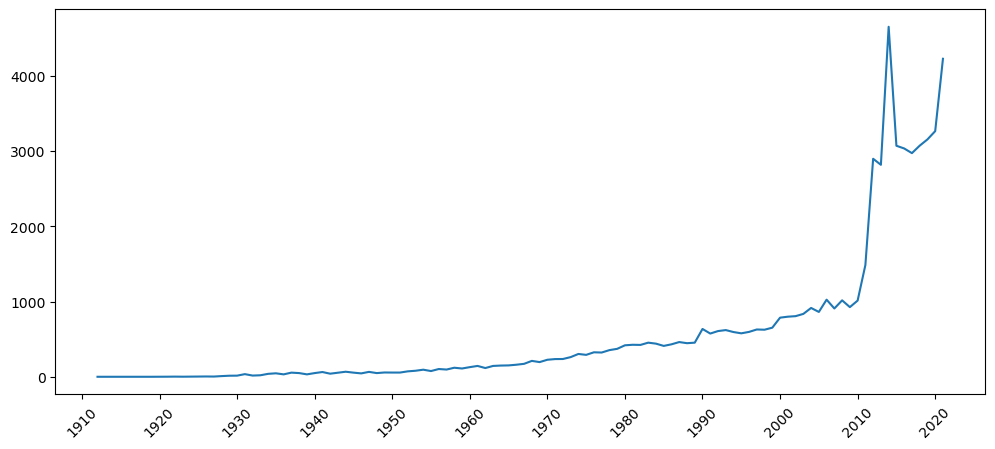

In [166]:
x_ticks = [year for year in range(1910, 2024, 10)]
plt.figure(figsize=(12,5))
plt.plot(yearly_encounters_num)
plt.xticks(ticks = x_ticks, rotation = 45)
plt.show()

In [167]:
#finding the peak year
print(f"The peak year is: {yearly_encounters_num.sort_values(ascending=False).index[0]}")

The peak year is: 2014


Total number of admissions per month

In [168]:
total_encounter_monthly = encounter_lvl_df[["MONTH","MONTH_ID"]].value_counts().sort_index(level=1)


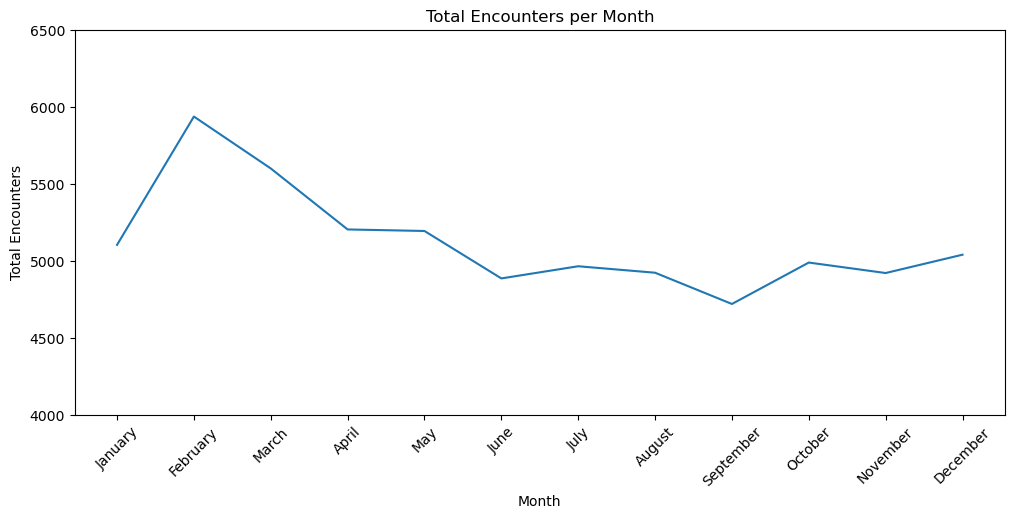

In [169]:
x_labels = [name[0] for name in total_encounter_monthly.index]
x_ticks = [name[1] for name in total_encounter_monthly.index]

plt.figure(figsize=(12,5))
plt.plot(encounter_lvl_df["MONTH_ID"].value_counts().sort_index())
plt.ylim(bottom = 4000, top = 6500)
plt.xticks(ticks = x_ticks, labels=x_labels, rotation = 45)
plt.xlabel("Month")
plt.ylabel("Total Encounters")
plt.title("Total Encounters per Month")
plt.show()

Average number of encounters per month

In [170]:
date_encounters_df = encounter_lvl_df[["MONTH_ID","YEAR", "ENCOUNTERCLASS"]]
encounters_per_year_n_month = date_encounters_df.pivot_table(index="YEAR", columns="MONTH_ID", values="ENCOUNTERCLASS", aggfunc="count")
monthly_avg_encounters = encounters_per_year_n_month.mean()

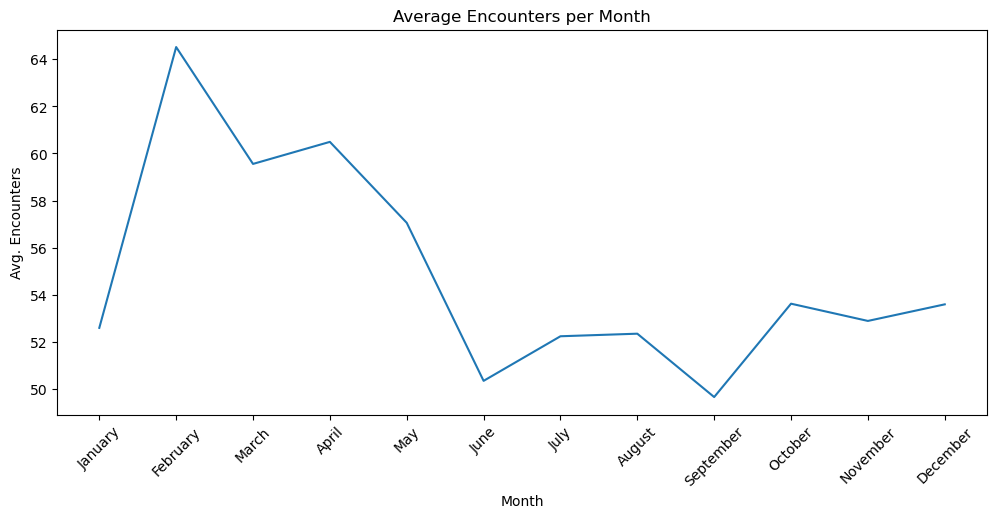

In [171]:
plt.figure(figsize=(12,5))
plt.plot(monthly_avg_encounters)
plt.xticks(ticks = x_ticks, labels=x_labels, rotation = 45)
plt.xlabel("Month")
plt.ylabel("Avg. Encounters")
plt.title("Average Encounters per Month")
plt.show()

Inspecting all the unique values in `ENCOUNTERCLASS`

In [172]:
encounter_lvl_df.ENCOUNTERCLASS.value_counts()

ENCOUNTERCLASS
wellness      24038
ambulatory    20124
outpatient    10837
urgentcare     2564
emergency      2168
inpatient      1728
Name: count, dtype: int64

Admission was represented in the dataset as __'inpatient'__ encounter class, while Emergency Department (ED) visit was represented as __'emergency'__ encounter class.

## 2.0 Analysing and comparing the monthly fluctuations
### 2.1 Analysing the monthly fluctuations in admissions and ED visits (`inpatient` and `emergency` encounters)

In [173]:
inpatient_df = encounter_lvl_df.loc[encounter_lvl_df.ENCOUNTERCLASS == "inpatient", ["YEAR","MONTH_ID","ENCOUNTERCLASS"]]
inpatient_pivot = inpatient_df.pivot_table(index="YEAR", columns=["MONTH_ID"], values="ENCOUNTERCLASS", aggfunc="count")
inpatient_pivot

MONTH_ID,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1931,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1952,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,4.0,8.0,7.0,5.0,4.0,8.0,5.0,3.0,2.0,6.0,1.0,6.0
2018,6.0,4.0,5.0,7.0,4.0,11.0,9.0,4.0,5.0,7.0,8.0,7.0
2019,3.0,5.0,6.0,8.0,11.0,11.0,9.0,10.0,9.0,11.0,23.0,27.0


In [174]:
emergency_df = encounter_lvl_df.loc[encounter_lvl_df.ENCOUNTERCLASS == "emergency", ["YEAR","MONTH_ID","ENCOUNTERCLASS"]]
emergency_pivot = emergency_df.pivot_table(index="YEAR", columns=["MONTH_ID"], values="ENCOUNTERCLASS", aggfunc="count")
emergency_pivot

MONTH_ID,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1919,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1921,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1929,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1931,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,8.0,14.0,18.0,12.0,10.0,7.0,11.0,8.0,13.0,14.0,9.0,12.0
2018,9.0,7.0,19.0,15.0,23.0,18.0,8.0,8.0,9.0,13.0,9.0,8.0
2019,14.0,10.0,15.0,15.0,14.0,14.0,9.0,8.0,15.0,10.0,14.0,15.0


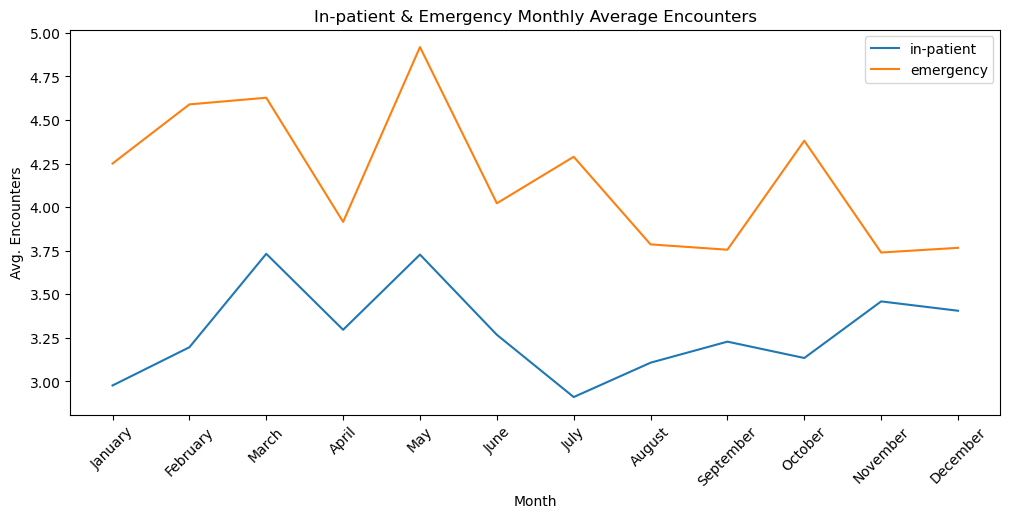

In [175]:
plt.figure(figsize=(12,5))
sns.lineplot(inpatient_pivot.mean(), label="in-patient")
sns.lineplot(emergency_pivot.mean(), label="emergency")
plt.xticks(ticks = x_ticks, labels=x_labels, rotation = 45)
plt.xlabel("Month")
plt.ylabel("Avg. Encounters")
plt.title("In-patient & Emergency Monthly Average Encounters")
plt.legend()
plt.show()

### 2.2 Analysing the monthly fluctuations in bed days (sum of `LOS_DAYS`)

In [177]:
los_df = encounter_lvl_df[["YEAR","MONTH_ID","LOS_DAYS"]]
los_pivot = los_df.pivot_table(index="YEAR", columns=["MONTH_ID"], values="LOS_DAYS", aggfunc="sum")
los_pivot

MONTH_ID,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010417,0.010417,NaN,NaN
1914,NaN,NaN,NaN,NaN,NaN,NaN,0.020833,NaN,NaN,NaN,NaN,NaN
1917,0.020833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,0.010417,0.010417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,0.010417,NaN,NaN,NaN,NaN,0.084606,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017,9.631887,11.522593,17.900463,10.813854,7.544502,11.556979,8.296736,6.009248,5.142963,11.319120,4.129988,9.174201
2018,9.322546,7.148970,21.560903,11.796505,8.587338,15.012431,12.519201,7.422708,8.503032,10.698565,11.415243,10.597292
2019,6.568808,8.555359,10.131377,25.581597,15.075509,14.659039,30.809595,17.480764,12.778472,14.303241,26.372627,30.610648


In [178]:
#A reusable function for ploting multiple annual time series data on the same graph
def plot_annual_time_series(plots_data = [dict()], y_label = None, title = None):
    years_x_ticks = list(range(1910,2025,10))

    plt.figure(figsize=(15,4))
    for plot in plots_data:
        plt.plot(plot["data"], label = plot["label"], c= plot["color"])
    plt.xticks(ticks = years_x_ticks)
    plt.xlabel("Years")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

In [179]:
#A reusable function for ploting multiple monthly time series data on the same graph
def plot_monthly_time_series(plots_data = [dict()], y_label = None, title = None):
    x_ax_ticks = list(range(1,13))
    x_ax_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    plt.figure(figsize=(10,4))
    for plot in plots_data:
        plt.plot(plot["data"], label = plot["label"], c= plot["color"])
    plt.xticks(ticks = x_ax_ticks, labels = x_ax_labels, rotation = 45)
    plt.xlabel("Month")
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()

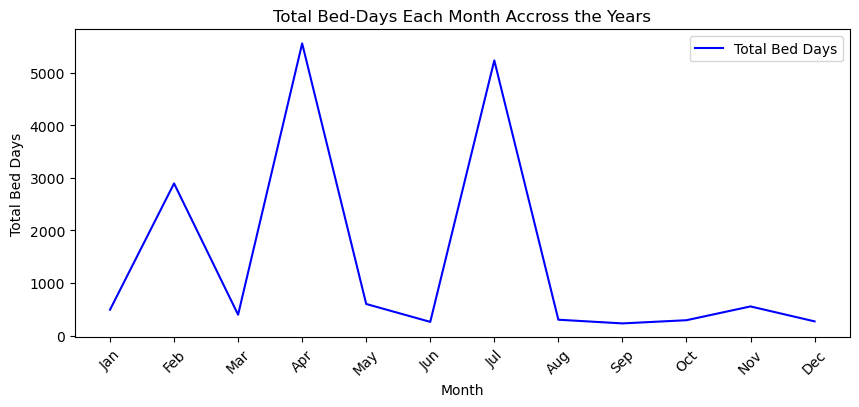

In [180]:
plot_data = {
    "data": los_pivot.sum(),
    "label": "Total Bed Days",
    "color": "blue"
}
plot_monthly_time_series(plots_data = [plot_data], y_label="Total Bed Days", title="Total Bed-Days Each Month Accross the Years")

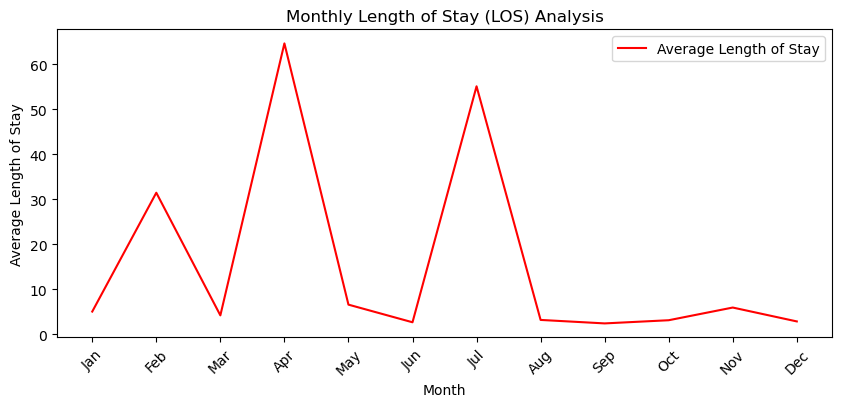

In [181]:
plot_data = {
    "data": los_pivot.mean(),
    "label": "Average Length of Stay",
    "color": "red"
}
plot_monthly_time_series(plots_data = [plot_data], y_label="Average Length of Stay", title="Monthly Length of Stay (LOS) Analysis")

## 3.0 Analysing the Total Bed Days of Each Service Lines and Diagnosis  
__Task:__ Determine which service lines (ED/inpatient/outpatient) and diagnosis categories have the highest total bed-days, and weather they show consistent growth over time. Identify any categories with sustained increases.

### 3.1 Service Lines Analysis
Finding the service lines (emergency/inpatient/outpatient) with the highest bed days

In [182]:
focus_encounters_df = encounter_lvl_df[encounter_lvl_df.ENCOUNTERCLASS.isin(["inpatient", "outpatient","emergency"])][["YEAR","MONTH_ID","ENCOUNTERCLASS","LOS_DAYS"]] #filter the data of year, month, and LOS for emergency encounter class
focus_encounters_df[["ENCOUNTERCLASS","LOS_DAYS"]].groupby("ENCOUNTERCLASS").sum().sort_values(by="LOS_DAYS", ascending=False)

,LOS_DAYS
ENCOUNTERCLASS,
inpatient,7720.979363
outpatient,2877.863368
emergency,512.746296


`inpatiient` service line has the highest bed-days with around 7,720 bed days accross the time period

Analysing Annual __In-Patient__ visits to find any consistent growth

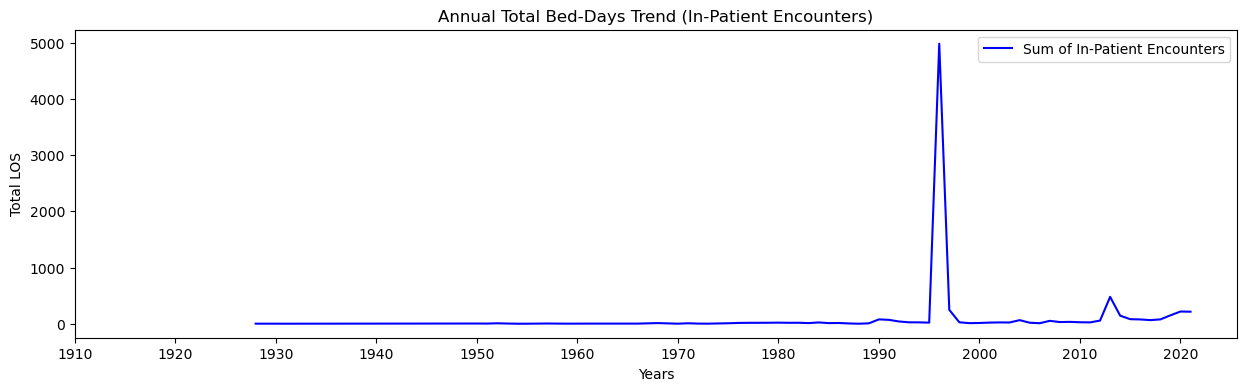

In [210]:
inpatient_sum_plot_data = {
    "data": focus_encounters_df[focus_encounters_df.ENCOUNTERCLASS == "inpatient"][["YEAR","LOS_DAYS"]].groupby("YEAR")["LOS_DAYS"].sum(),
    "label": "Sum of In-Patient Encounters",
    "color": "blue"
}
plot_annual_time_series(plots_data=[inpatient_sum_plot_data], y_label="Total LOS", title="Annual Total Bed-Days Trend (In-Patient Encounters)")

Analysing the average monthly trends of In-Patients encounters

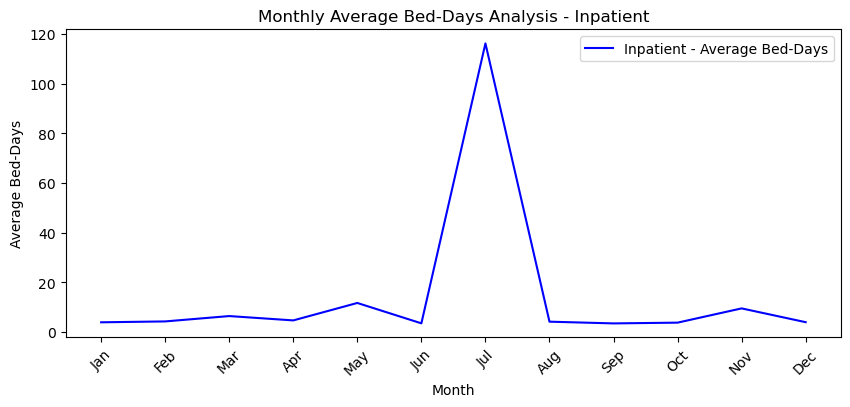

In [195]:
inpatient_plot_data = {
    "data": focus_encounters_df[focus_encounters_df.ENCOUNTERCLASS == "inpatient"].pivot_table(index="YEAR", columns=["MONTH_ID"], values="LOS_DAYS", aggfunc="sum").mean(),
    "label": "Inpatient - Average Bed-Days",
    "color": "blue"
}

plot_monthly_time_series(plots_data = [inpatient_plot_data], y_label="Average Bed-Days", title="Monthly Average Bed-Days Analysis - Inpatient")

**Analysing the other two classes over time**

Analysing Average Monthy __Emergency__ Visits seperately

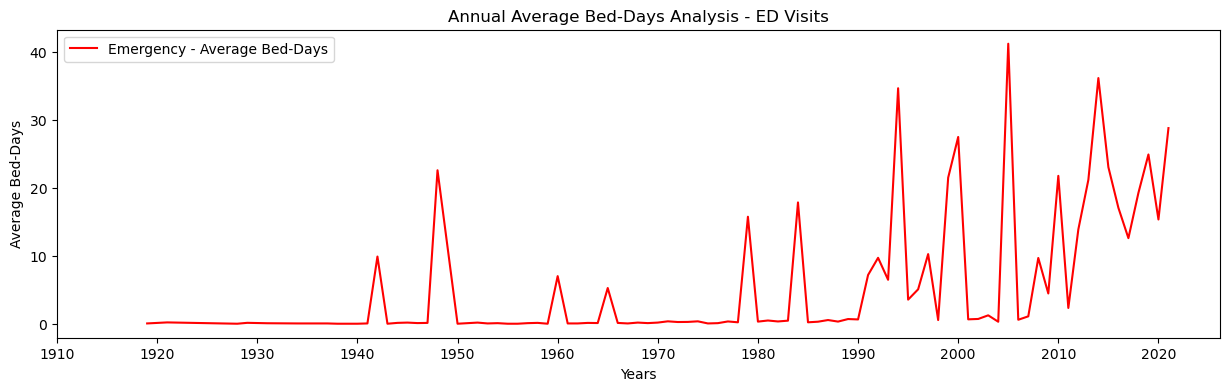

In [199]:
emergency_plot_data = {
    "data": focus_encounters_df[focus_encounters_df.ENCOUNTERCLASS == "emergency"][["YEAR","LOS_DAYS"]].groupby("YEAR")["LOS_DAYS"].sum(),
    "label": "Emergency - Average Bed-Days",
    "color": "red"
}
plot_annual_time_series(plots_data = [emergency_plot_data], y_label="Average Bed-Days", title="Annual Average Bed-Days Analysis - ED Visits")

Analysing Average Monthy __Out-Patient__ Visits seperately

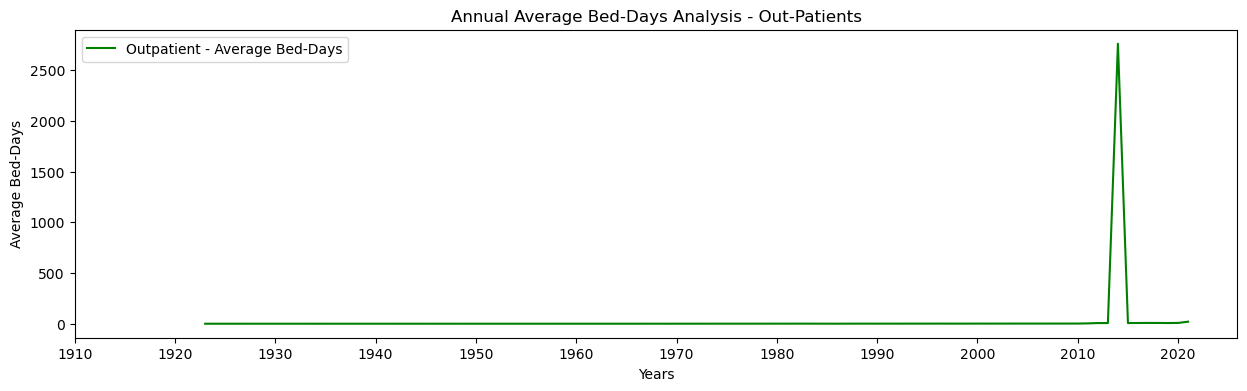

In [208]:
outpatient_plot_data = {
    "data": focus_encounters_df[focus_encounters_df.ENCOUNTERCLASS == "outpatient"][["YEAR","LOS_DAYS"]].groupby("YEAR")["LOS_DAYS"].sum(),
    "label": "Outpatient - Average Bed-Days",
    "color": "green"
}
plot_annual_time_series(plots_data = [outpatient_plot_data], y_label="Average Bed-Days", title="Annual Average Bed-Days Analysis - Out-Patients")

### 3.2 Diagnosis Categories Analysis
Finding the diagnosis with the highest bed days

In [ ]:
highest_diag_codes = encounter_lvl_df[["LOS_DAYS", "PRIMARY_DIAG_CODE"]].groupby("PRIMARY_DIAG_CODE").sum().sort_values(by="LOS_DAYS", ascending=False).head()
print(f"Top 5 diagnosis with highest bed-days: \n{highest_diag_codes}")
print(f"\nThe diagnosis with the highest bed days is '{encounter_lvl_df[encounter_lvl_df.PRIMARY_DIAG_CODE == highest_diag_codes.index[0]]["PRIMARY_DIAG_DESC"].iloc[0]}' with code '{highest_diag_codes.index[0]}'")

Top 5 diagnosis with highest bed-days: 
                      LOS_DAYS
PRIMARY_DIAG_CODE             
185347001          9418.519294
185345009          5261.669525
183452005           471.204595
86013001            415.885972
1505002             207.465023

The diagnosis with the highest bed days is 'Encounter for problem' with code '185347001'


Visualising the annual trend of total and average bed-days of the __"Encounter for problem"__ diagnosis category

In [ ]:
highest_diag_df = encounter_lvl_df[encounter_lvl_df.PRIMARY_DIAG_CODE == highest_diag_codes.index[0]][["YEAR","MONTH_ID","LOS_DAYS"]] #filtering the data of the highest diagnosis category by LOS

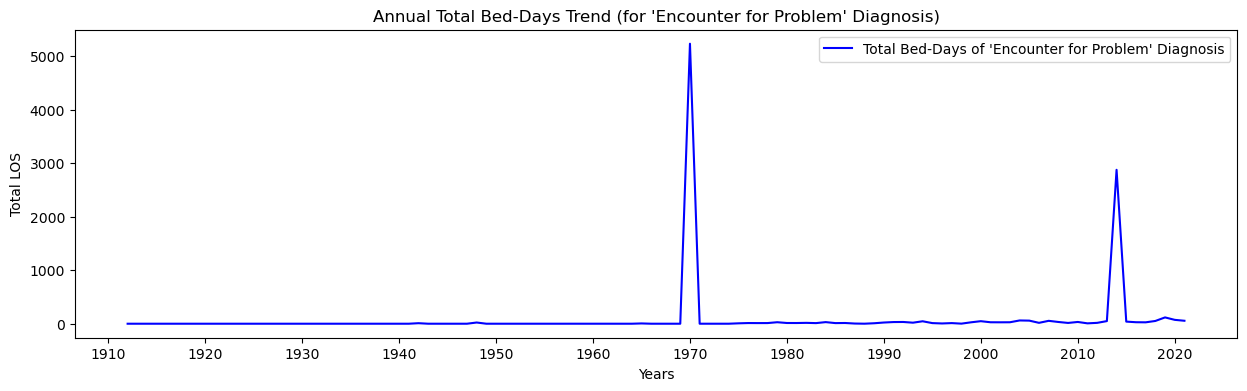

In [211]:
#annually - total count
inpatient_sum_plot_data = {
    "data": highest_diag_df.groupby("YEAR")["LOS_DAYS"].sum(),
    "label": "Total Bed-Days of 'Encounter for Problem' Diagnosis",
    "color": "blue"
}
plot_annual_time_series(plots_data=[inpatient_sum_plot_data], y_label="Total LOS", title="Annual Total Bed-Days Trend (for 'Encounter for Problem' Diagnosis)")

Visualising time-seires graphs to show the trend of all diagnosis categories over years to find the categories with consistent growth over time.

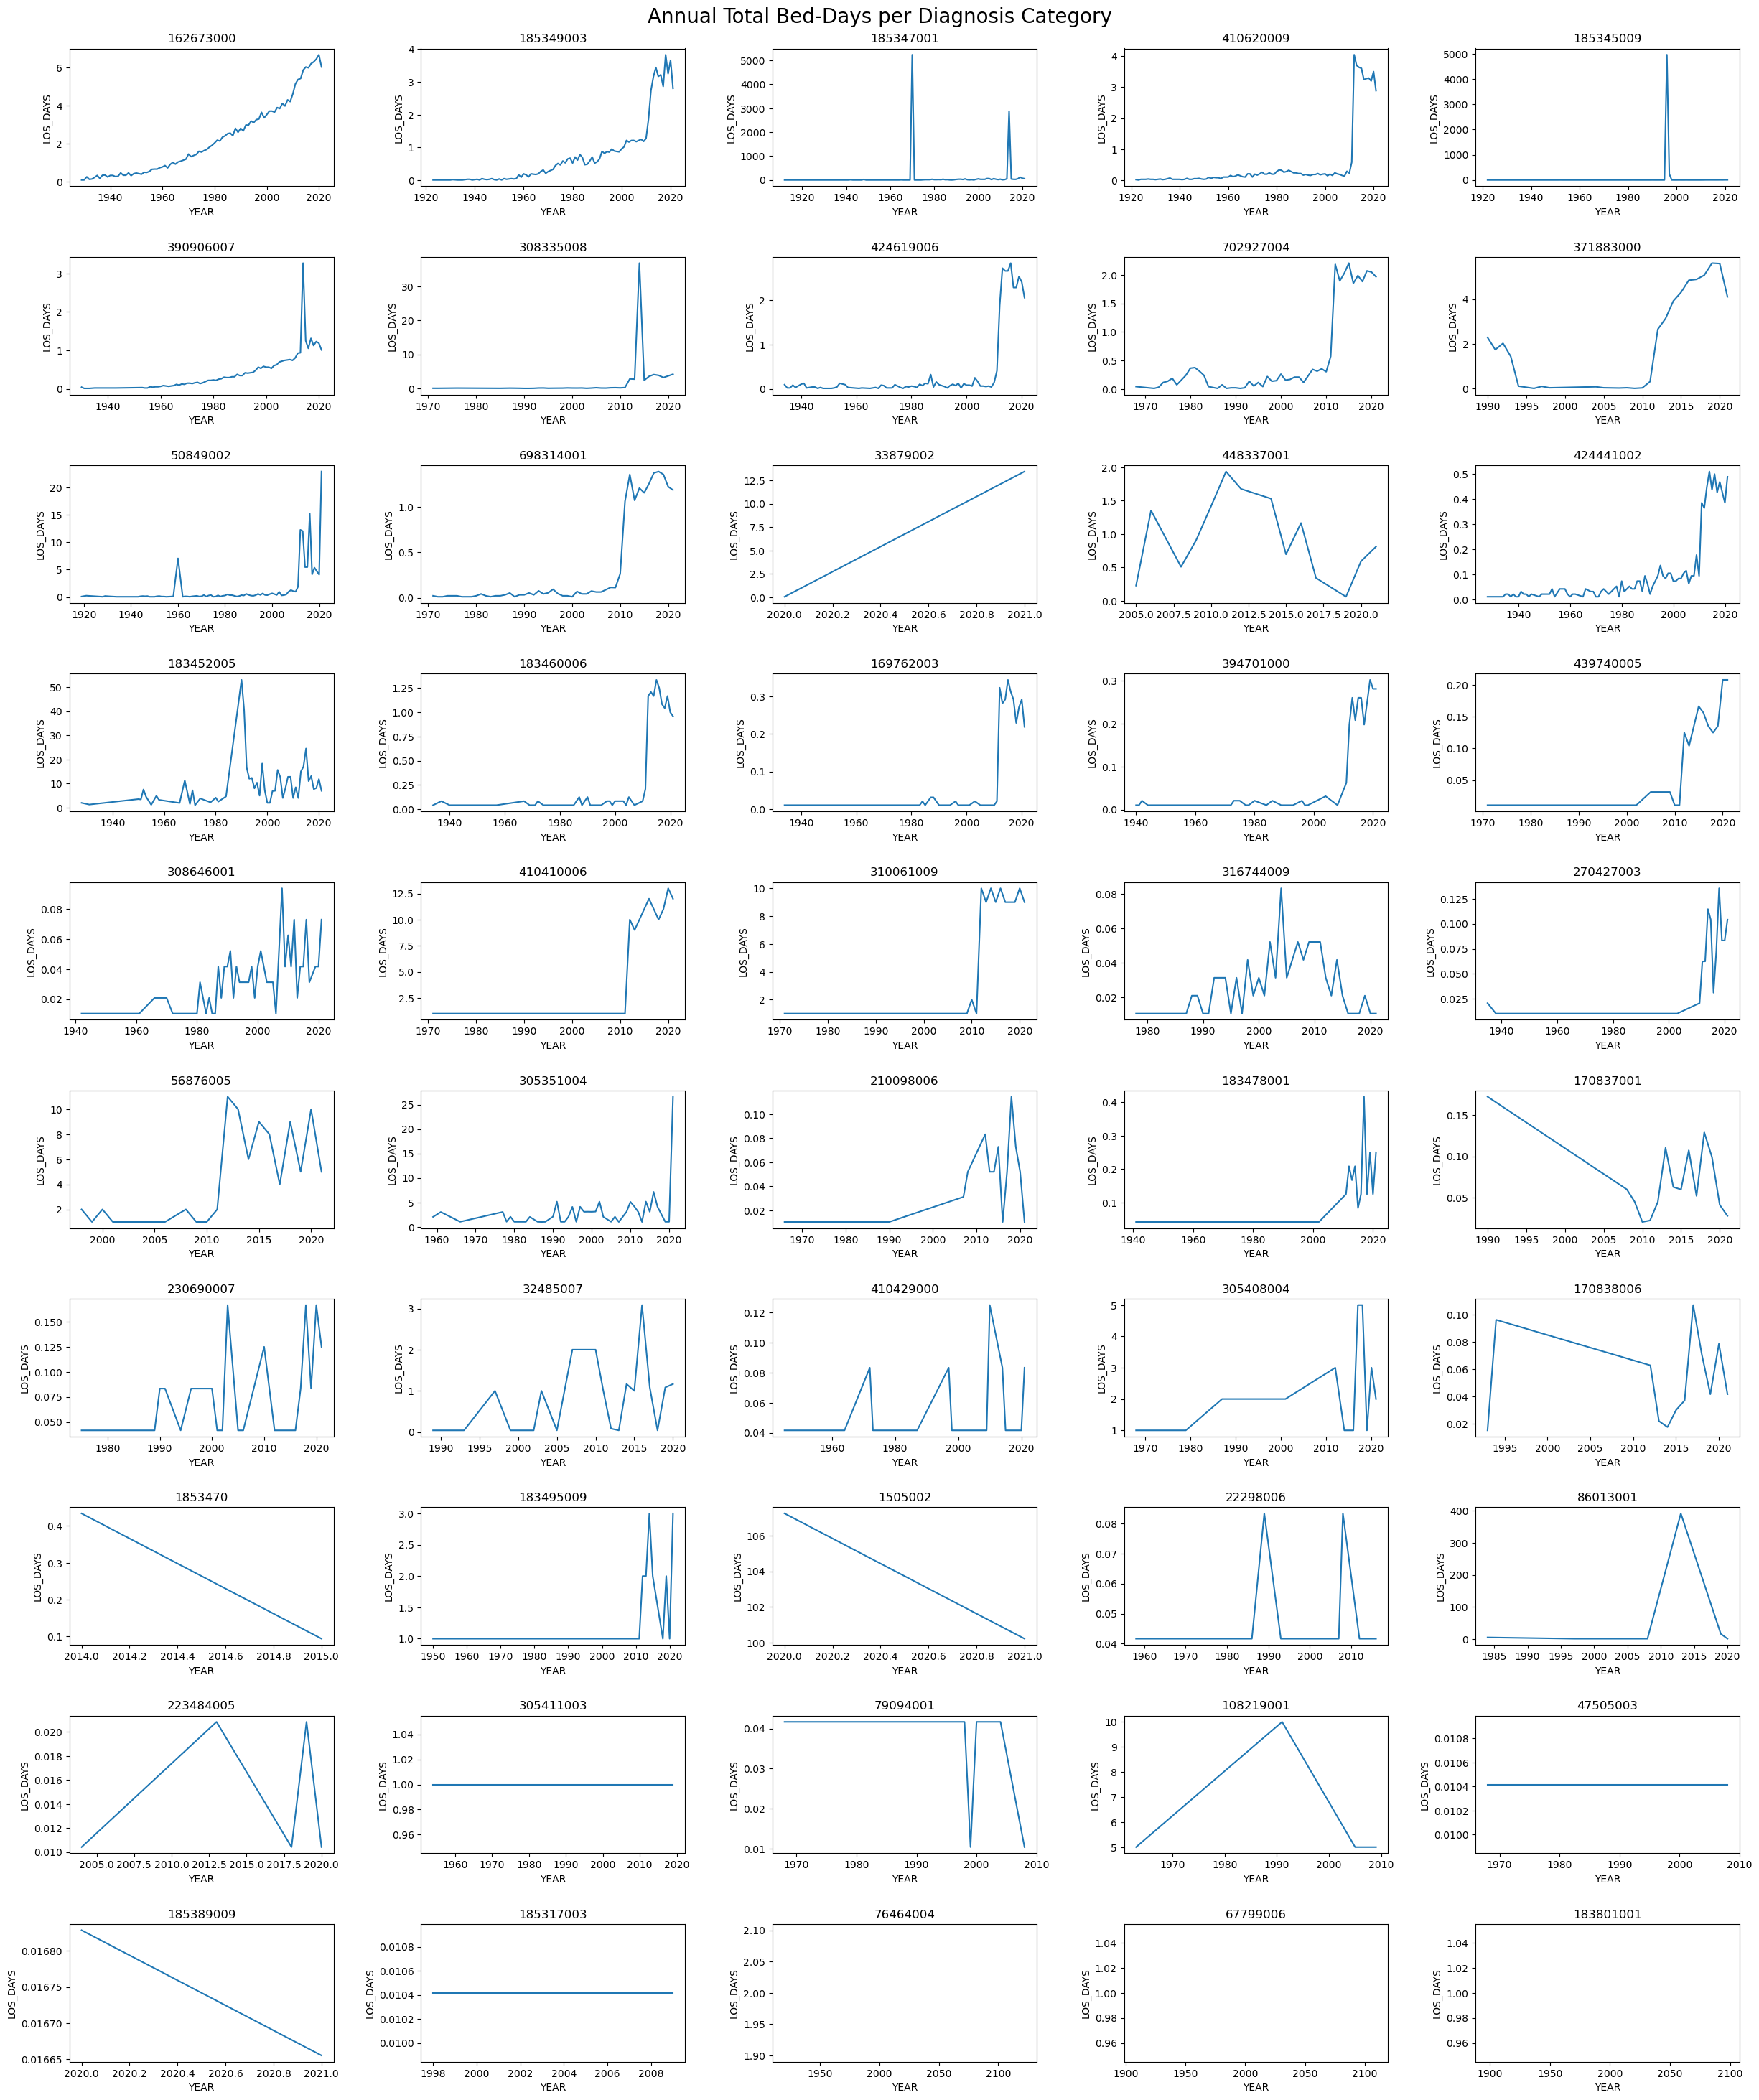

In [263]:
diag_df = encounter_lvl_df[["YEAR","LOS_DAYS", "PRIMARY_DIAG_DESC","PRIMARY_DIAG_CODE"]]
diag_codes = list(diag_df.PRIMARY_DIAG_CODE.value_counts().index)
years_x_ticks = list(range(1910,2025,20))

rows = 10
cols = 5

#plotting a large object of subplots to show the trend of all diagnosis categories over the years
fig, axs = plt.subplots(rows,cols)
fig.set_figwidth(25)
fig.set_figheight(30)
index_count = 0
row_count = 0
while row_count < rows:
    col_count = 0
    while col_count < cols:
        if index_count < len(diag_codes):
            data = diag_df[diag_df.PRIMARY_DIAG_CODE == diag_codes[index_count]].groupby("YEAR", sort=True)["LOS_DAYS"].sum()
            axs[row_count][col_count].set_title(diag_codes[index_count])
            # axs[row_count][col_count].xticks(ticks = years_x_ticks)
            sub_plot = sns.lineplot(data, ax = axs[row_count][col_count])
            # sub_plot.set_xticks(years_x_ticks)
        else: break
        col_count += 1
        index_count += 1
    row_count+=1

fig.suptitle("Annual Total Bed-Days per Diagnosis Category", fontsize = 20)
plt.tight_layout(pad=2.5)
plt.show()

## 4.0 Exploring the seasonal variations across major diagnosis
__Task:__ Explore the seasonal variations by month in utilisation across major diagnosis groups. Are there any categories that are sensitive to specific time periods?

In [281]:
#tabulating the seasons in the UK
seasons = pd.DataFrame({
    "Winter" : [12,1,2], #December - February
    "Spring" : [3,4,5], #March - May
    "Summer" : [6,7,8], #June - August
    "Autumn" : [9,10,11], #September - November
}, index=["Start", "Mid", "End"])

#assigning IDs to the seasons
seasons_ids = {
    "Winter" : 1,
    "Spring" : 2,
    "Summer" : 3,
    "Autumn" : 4,
}

print(seasons_ids)
seasons

{'Winter': 1, 'Spring': 2, 'Summer': 3, 'Autumn': 4}


,Winter,Spring,Summer,Autumn
Start,12,3,6,9
Mid,1,4,7,10
End,2,5,8,11


In [282]:
data = np.where(encounter_lvl_df.MONTH_ID.isin(seasons.Winter), seasons_ids["Winter"], 
                np.where(encounter_lvl_df.MONTH_ID.isin(seasons.Spring), seasons_ids["Spring"],
                np.where(encounter_lvl_df.MONTH_ID.isin(seasons.Summer), seasons_ids["Summer"],seasons_ids["Autumn"])))
encounter_lvl_df.insert(list(encounter_lvl_df.columns).index("MONTH_ID") + 1, "SEASON_ID", data) #categorise the months into seasons and insert it into the dataframe just after the "MONTH_ID" column
encounter_lvl_df.head(2)

,ID,PATIENT,START,STOP,YEAR,MONTH,MONTH_ID,SEASON_ID,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT,CONDITION_COUNT_PRESENT
0,748f8357-6cc7-551d-f31a-32fa2cf84126,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-02-17 05:07:38,2019-02-17 05:22:38,2019,February,2,1,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0,Unspecified,0.010417,877.79,0.000000,410620009,Well child visit (procedure),<NA>,missing
1,5a4735ae-423f-6563-28ab-b3d11b49b2d4,b9c610cd-28a6-4636-ccb6-c7a0d2a4cb85,2019-03-24 05:07:38,2019-03-24 05:22:38,2019,March,3,2,wellness,82608ebb-037c-3cef-9d34-3736d69b29e8,0,Unspecified,0.010417,269.68,0.095825,410620009,Well child visit (procedure),<NA>,missing


In [315]:
#get top 6 diagnosis by count
top_6_diag_count = encounter_lvl_df.PRIMARY_DIAG_CODE.value_counts(ascending=False).head(6)
print("Top 6 diagnosis codes by count")
top_6_diag_count

Top 6 diagnosis codes by count


PRIMARY_DIAG_CODE
162673000    19374
185349003     5812
185347001     5245
410620009     4507
185345009     4261
390906007     3041
Name: count, dtype: int64

In [316]:
#get the season data of the top 6 diagnosis
diag_by_season = encounter_lvl_df[encounter_lvl_df.PRIMARY_DIAG_CODE.isin(top_6_diag_count.index)][["SEASON_ID", "PRIMARY_DIAG_CODE"]]
diag_by_season_crosstab = pd.crosstab(index = diag_by_season.SEASON_ID, columns = diag_by_season.PRIMARY_DIAG_CODE, )
diag_by_season_crosstab

PRIMARY_DIAG_CODE,162673000,185345009,185347001,185349003,390906007,410620009
SEASON_ID,,,,,,
1,5260,1064,1425,1415,699,1073
2,5050,1063,1307,1458,715,1170
3,4547,1047,1201,1470,788,1176
4,4517,1087,1312,1469,839,1088


In [317]:
#checking correlation betweeen diagnosis_id and season_id
diag_by_season.corr()

,SEASON_ID,PRIMARY_DIAG_CODE
SEASON_ID,1.000000,0.028937
PRIMARY_DIAG_CODE,0.028937,1.000000


There is no correlation between season and diagnosis

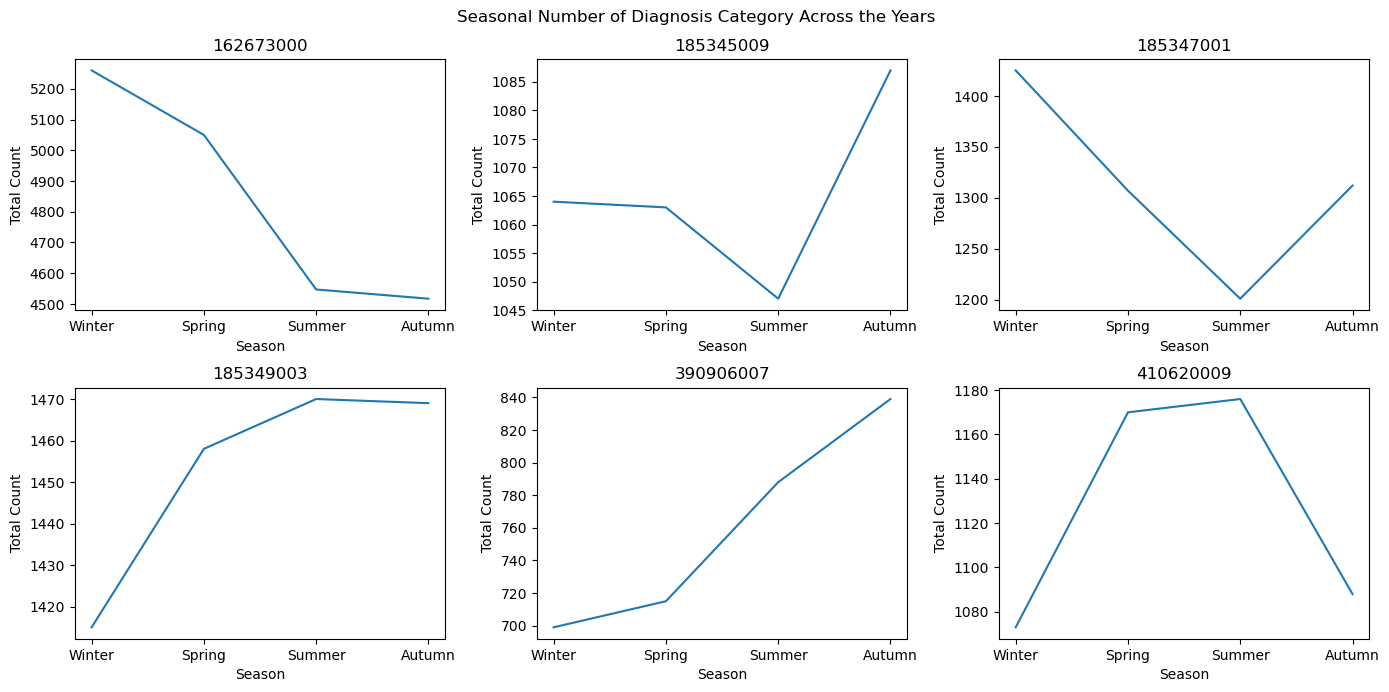

In [322]:
#plot the combo graph that shows all categories' tred over the seasons
diag_codes = diag_by_season_crosstab.columns

rows = 2
cols = 3

#plotting a large object of subplots to show the trend of all diagnosis categories over the years
fig, axs = plt.subplots(rows,cols)
fig.set_figwidth(14)
fig.set_figheight(7)
index_count = 0
row_count = 0
while row_count < rows:
    col_count = 0
    while col_count < cols:
        if index_count < len(diag_codes):
            data = diag_by_season_crosstab[diag_codes[index_count]]
            axs[row_count][col_count].set_title(diag_codes[index_count])
            sub_plot = sns.lineplot(data, ax = axs[row_count][col_count])
            sub_plot.set_xticks(ticks = list(seasons_ids.values()), labels = list(seasons_ids.keys()))
            sub_plot.set_xlabel("Season")
            sub_plot.set_ylabel("Total Count")
        else: break
        col_count += 1
        index_count += 1
    row_count+=1

fig.suptitle("Seasonal Number of Diagnosis Category Across the Years")
plt.tight_layout(pad=1)
plt.show()

## 5.0 Analysing Shifts in Patient Journeys Across Multiple Encounters
__Task:__ Analyse shifts in patient journeys across multiple encounters, including 30-day readmissions, to identify recurring patterns or significant changes in pathways. Determine whether these trends can provide actionable insights for capacity planning, discharge planning, and targeted follow-up

### 5.1 Analysing the Patient Timelines to Study the Pathways

1. Sorting the dataset by the `PATIENT` and `START` date in ascending order so that the encounter-class journey of a patient can be analysed

In [ ]:
#sort the dataframe by PATIENT and START attributes
sorted_encounters_df = encounter_lvl_df.sort_values(["PATIENT", "START"])
sorted_encounters_df.head()

,ID,PATIENT,START,STOP,YEAR,MONTH,MONTH_ID,SEASON_ID,ENCOUNTERCLASS,PROVIDER,REASONCODE,REASONDESCRIPTION,LOS_DAYS,TOTAL_COST,AGE_AT_START,PRIMARY_DIAG_CODE,PRIMARY_DIAG_DESC,CONDITION_COUNT,CONDITION_COUNT_PRESENT
35318,39fad31f-f0e2-061f-2a6b-dec159df271a,00126cb9-8460-4747-e302-c3609684531e,2005-07-23 23:28:56,2005-07-23 23:43:56,2005,July,7,3,wellness,c356746e-d1c8-3a3e-b4e7-fffa0e98da76,0,Unspecified,0.010417,1212.05,18.149213,162673000,General examination of patient (procedure),3,present
35319,482f855e-39e7-9145-7f19-8924573ab8b7,00126cb9-8460-4747-e302-c3609684531e,2005-08-22 23:28:56,2005-08-22 23:43:56,2005,August,8,3,ambulatory,c4d2ed7d-e1b3-37e2-82f9-b21046309ba4,59621000,Hypertension,0.010417,77.49,18.231348,390906007,Hypertension follow-up encounter,<NA>,missing
35320,0b1d4e8a-61dd-b713-bada-b6f66eb678b6,00126cb9-8460-4747-e302-c3609684531e,2006-07-29 23:28:56,2006-07-29 23:43:56,2006,July,7,3,wellness,c356746e-d1c8-3a3e-b4e7-fffa0e98da76,0,Unspecified,0.010417,786.33,19.164956,162673000,General examination of patient (procedure),1,present
35321,86c47926-8246-7203-4157-314c7f5b23ed,00126cb9-8460-4747-e302-c3609684531e,2007-08-04 23:28:56,2007-08-04 23:43:56,2007,August,8,3,wellness,c356746e-d1c8-3a3e-b4e7-fffa0e98da76,0,Unspecified,0.010417,1497.66,20.180698,162673000,General examination of patient (procedure),<NA>,missing
35322,dec0f17f-c805-6c2b-d962-fbb0c120bdb0,00126cb9-8460-4747-e302-c3609684531e,2008-08-09 23:28:56,2008-08-09 23:43:56,2008,August,8,3,wellness,c356746e-d1c8-3a3e-b4e7-fffa0e98da76,0,Unspecified,0.010417,1635.52,21.196441,162673000,General examination of patient (procedure),1,present


2. Finding patients encounter record that shows 30 day readmissions.

Checking the patient with the highest number of record so that their pathways can be studied

In [325]:
sorted_encounters_df.PATIENT.value_counts()

PATIENT
ef167059-cef0-12c4-49db-993ca3a20c01    1563
a1c127d9-d31e-36b1-2a3e-3014be9bfdf0     838
e23c7a6e-6ef2-3932-1361-b73b4c8a3961     705
8c6ae452-5f8c-9ff6-006d-c6c860acf5cd     638
e6178711-3936-e332-814d-19d8851e314d     497
                                        ... 
dc234609-fb36-d5ba-bf99-c04b4f107790       4
3c0f81dc-96bf-3f9c-6e4f-5763f9614fb2       3
c28b00a3-54c0-21ba-4ed7-de871f1b157f       2
ef3624d5-0c77-e990-c856-064916d06155       2
363f50e2-9771-dfb4-1ff5-3d7db24b9ada       2
Name: count, Length: 1163, dtype: int64